#Start by importing all important libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#Read the csv file and assign it to a variable.

In [4]:
df = pd.read_csv('imdb_top_1000.csv')

#Display shape of dataframe

In [8]:
list(df.shape)

[1000, 16]

#Print all columns of dataframe

In [9]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

#Remove the column 'Poster_Link' and update the dataframe.

In [10]:
df = df.drop('Poster_Link',axis = 1)

#Set the 'Series_Title' column as the index of dataframe

In [11]:
index = df['Series_Title']

df.set_index(index,inplace = True)

df.index

Index(['The Shawshank Redemption', 'The Godfather', 'The Dark Knight',
       'The Godfather: Part II', '12 Angry Men',
       'The Lord of the Rings: The Return of the King', 'Pulp Fiction',
       'Schindler's List', 'Inception', 'Fight Club',
       ...
       'Giù la testa', 'Kelly's Heroes', 'The Jungle Book', 'Blowup',
       'A Hard Day's Night', 'Breakfast at Tiffany's', 'Giant',
       'From Here to Eternity', 'Lifeboat', 'The 39 Steps'],
      dtype='object', name='Series_Title', length=1000)

#Print a list of all the unique Genre

In [12]:
Uni_Gen = list(df['Genre'].unique())

Uni_Gen

['Drama',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Action, Adventure, Drama',
 'Biography, Drama, History',
 'Action, Adventure, Sci-Fi',
 'Drama, Romance',
 'Western',
 'Action, Sci-Fi',
 'Biography, Crime, Drama',
 'Action, Adventure, Fantasy',
 'Comedy, Drama, Thriller',
 'Adventure, Drama, Sci-Fi',
 'Animation, Adventure, Family',
 'Drama, War',
 'Crime, Drama, Fantasy',
 'Comedy, Drama, Romance',
 'Crime, Drama, Mystery',
 'Crime, Drama, Thriller',
 'Action, Drama, Mystery',
 'Drama, Family, Fantasy',
 'Drama, Music',
 'Biography, Comedy, Drama',
 'Drama, Mystery, Sci-Fi',
 'Biography, Drama, Music',
 'Crime, Mystery, Thriller',
 'Animation, Adventure, Drama',
 'Animation, Drama, War',
 'Adventure, Comedy, Sci-Fi',
 'Horror, Mystery, Thriller',
 'Drama, Romance, War',
 'Comedy, Drama, Family',
 'Animation, Drama, Fantasy',
 'Action, Biography, Drama',
 'Animation, Action, Adventure',
 'Drama, Western',
 'Action, Adventure',
 'Comedy, Drama',
 'Drama, Family',
 'Drama, Mystery, 

#1. What is the Number of Directors in the given dataset ? 

In [13]:
a = list(df['Director'].unique())
len(a)
a

['Frank Darabont',
 'Francis Ford Coppola',
 'Christopher Nolan',
 'Sidney Lumet',
 'Peter Jackson',
 'Quentin Tarantino',
 'Steven Spielberg',
 'David Fincher',
 'Robert Zemeckis',
 'Sergio Leone',
 'Lana Wachowski',
 'Martin Scorsese',
 'Irvin Kershner',
 'Milos Forman',
 'Thomas Kail',
 'Bong Joon Ho',
 'Sudha Kongara',
 'Fernando Meirelles',
 'Hayao Miyazaki',
 'Roberto Benigni',
 'Jonathan Demme',
 'George Lucas',
 'Masaki Kobayashi',
 'Akira Kurosawa',
 'Frank Capra',
 'Todd Phillips',
 'Damien Chazelle',
 'Olivier Nakache',
 'Roman Polanski',
 'Ridley Scott',
 'Tony Kaye',
 'Bryan Singer',
 'Luc Besson',
 'Roger Allers',
 'James Cameron',
 'Giuseppe Tornatore',
 'Isao Takahata',
 'Alfred Hitchcock',
 'Michael Curtiz',
 'Charles Chaplin',
 'Nadine Labaki',
 'Can Ulkay',
 'Gayatri',
 'Makoto Shinkai',
 'Nitesh Tiwari',
 'Bob Persichetti',
 'Anthony Russo',
 'Lee Unkrich',
 'Rajkumar Hirani',
 'Aamir Khan',
 'Andrew Stanton',
 'Florian Henckel von Donnersmarck',
 'Chan-wook Park',


#2. What is the mean, median and standard deviation of IMDB rating in the dataset ?

In [14]:
Mean = df['IMDB_Rating'].mean()
Median = df['IMDB_Rating'].median()
SD = df['IMDB_Rating'].std()

Mean , Median , SD

(7.949299999999999, 7.9, 0.27549120749200917)

#3. Which director has directed the most number of movies?

In [16]:
D_List = list(df['Director'].unique())
max = df['Director'].value_counts().max()
Mov_Count = df['Director'].value_counts()
for d in D_List:
    if Mov_Count[d] == max:
        print(d)

Alfred Hitchcock


#4. Name the Movie which has the highest Runtime ?

In [17]:
Run_Time = list(df['Runtime'])
time = []
time_1 = []
for i in range(len(Run_Time)):
    time.append(int(Run_Time[i][:3]))
    time_1.append(int(Run_Time[i][:3]))

time.sort(reverse = True)
max = time[0]

ind = []
for i in range(len(Run_Time)):
    if time_1[i] == max:
       ind.append(i) 
ind

print("Maximum Runtime is {} min of Movie :: {}".format(max,df['Series_Title'].iloc[140]))

Maximum Runtime is 321 min of Movie :: Gangs of Wasseypur


#5. How many movies are released after year 2000 and have IMDB rating > 8.5 ?

In [18]:
df.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [19]:
Year = list(df['Released_Year'])
Rating = list(df['IMDB_Rating'])
n = 0
for i in  range(len(Year)):
    if Year[i] != 'PG' and int(Year[i]) > 2000 and Rating[i] > 8.5:
        n += 1
print("Total number of movies are {}".format(n))

Total number of movies are 11


#Using seaborn make different types of plots, observe the trend and answer the questions.
#6. Make a countplot of Movies directed by top 5 directors.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Frank Darabont'),
  Text(1, 0, 'Francis Ford Coppola'),
  Text(2, 0, 'Christopher Nolan'),
  Text(3, 0, 'Sidney Lumet'),
  Text(4, 0, 'Peter Jackson')])

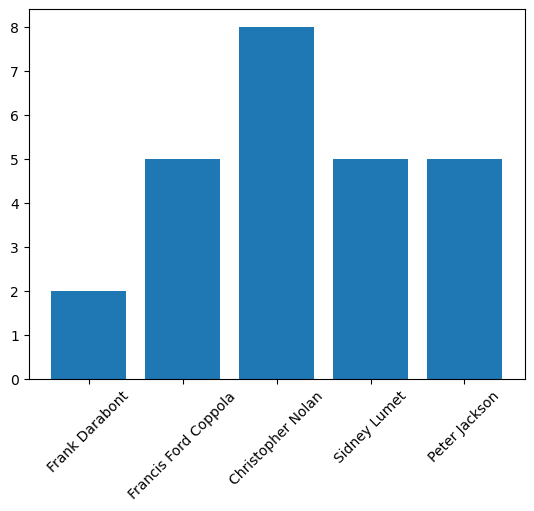

In [22]:
List = df['Director'].unique()
Dir = List[:5]

No_Mov = []
n = 0

for d in Dir:
    for i in range(1000):
        if df['Director'].iloc[i] == d:
            n +=1 
    No_Mov.append(n)
    n = 0

df4 = pd.DataFrame({'Director':Dir,'No_of_Movies':No_Mov})
df4
x = Dir
y = No_Mov
plt.bar(x,y)
plt.xticks(rotation=45)

#7. Make a plot to analyze distribution of IMDB rating?

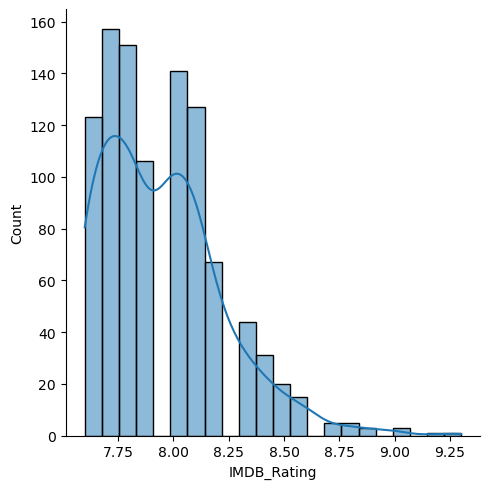

In [23]:
sb.displot(df['IMDB_Rating'],kde = True)

#8. What type of Genre has the highest IMDB rating?

In [24]:
Genre = list(df['Genre'].unique())
n = 0
m = 0
avg_rat = []
for gen in Genre:
    for i in range(1000):
        if df['Genre'].iloc[i] == gen:
            n += df['IMDB_Rating'].iloc[i]
            m += 1
    avg_rat.append(n/m)
    n = 0
    m=0
    

df2 = pd.DataFrame({'Genre':Genre ,'Avg_Rat':avg_rat})
df2 = df2.sort_values('Avg_Rat',ascending=False)
print("Genre of Highest IMDB Rating : {} ".format(df2['Genre'].iloc[0]))

Genre of Highest IMDB Rating : Animation, Drama, War 


#9. Name the top 5 movies that have earned highest Meta score. 

In [25]:
df1 = df[['Series_Title' , 'Meta_score']]
df1 = df1.sort_values(by = 'Meta_score',ascending=False)

df1 = list(df1['Series_Title'].head(5).values)
print("Top 5 Moviees according to Meta_Score are : ")
print([i for i in df1])

Top 5 Moviees according to Meta_Score are : 
['Sweet Smell of Success', 'Rear Window', 'Casablanca', 'Trois couleurs: Rouge', 'Notorious']


#10. Of which Genre movie has the highest Runtime?

In [26]:
# Here we will talk in terms of average

n = 0
m = 0
Avg_t = []
for gen in Genre:
    for i in range(1000):
        if df['Genre'].iloc[i] == gen:
            n += int(df['Runtime'].iloc[i][:3])
            m += 1
            
    Avg_t.append(n/m)
    n = 0
    m = 0
    
df3 = pd.DataFrame({'Genre':Genre,'Avg_Time':Avg_t})
df3 = df3.sort_values('Avg_Time',ascending=False)

print("Genre of Highest Runtime : {} ".format(df3['Genre'].iloc[0]))

Genre of Highest Runtime : Adventure, Drama, Musical 
